In [ ]:
import cv2
import glob
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from google.colab.patches import cv2_imshow
import random
import string

# Создаем изображение
width = 920
height = 1280
font_size = [14]
empty_pages_pathes = glob.glob('/content/content/Empty_pages/*')

def generate_random_string(length):
    # Создаем список всех возможных символов
    all_chars = string.ascii_letters + string.digits + string.punctuation + "абвгдеёжзийклмнопрстуфхцчшщъыьэюя" + "АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ"
    # Генерируем случайную строку указанной длины
    return ''.join((' ' if random.random() < 0.3 else random.choice(all_chars)) for _ in range(length))

# Функция для добавления текста на изображение
def add_text(image, text, font_path, font_size, color):
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.truetype(font_path, font_size)
    y = 0
    for line in text.split('\n'):
        text_size = draw.textsize(line, font=font)
        x = (image.shape[1] - text_size[0]) // 2
        draw.text((x, y), line, font=font, fill=color)
        y += text_size[1]
    return np.array(pil_image)

# Указываем путь к шрифтам на вашей системе
font_path_en = "/content/Times New Roman.ttf"
font_path_ru = "/content/Times New Roman.ttf"

# Генерируем текст на английском языке
for i in range(10):
  text_en = ''
  for j in range(50):
    text_en += generate_random_string(500) + '\n'
  image = cv2.imread(random.choice(empty_pages_pathes))
  image = add_text(image, text_en, font_path_en, random.choice(font_size), (0, 0, 0))
  cv2.imwrite(f'/content/Results/result{i}.jpg', image)

In [ ]:
!mkdir 'Results'

In [ ]:
!unzip '/content/Empty_pages.zip'

Archive:  /content/Empty_pages.zip
   creating: content/Empty_pages/
  inflating: content/Empty_pages/res5.jpg  
  inflating: content/Empty_pages/res1.jpg  
  inflating: content/Empty_pages/res8.jpg  
  inflating: content/Empty_pages/res2.jpg  
  inflating: content/Empty_pages/res7.jpg  
  inflating: content/Empty_pages/res14.jpg  
  inflating: content/Empty_pages/res15.jpg  
  inflating: content/Empty_pages/res0.jpg  


In [ ]:
!rm -r '/content/Results'

In [ ]:
!zip -r Results.zip '/content/Results'

  adding: content/Results/ (stored 0%)
  adding: content/Results/result997.jpg (deflated 1%)
  adding: content/Results/result561.jpg (deflated 1%)
  adding: content/Results/result221.jpg (deflated 1%)
  adding: content/Results/result140.jpg (deflated 1%)
  adding: content/Results/result223.jpg (deflated 1%)
  adding: content/Results/result522.jpg (deflated 1%)
  adding: content/Results/result850.jpg (deflated 1%)
  adding: content/Results/result309.jpg (deflated 1%)
  adding: content/Results/result582.jpg (deflated 1%)
  adding: content/Results/result466.jpg (deflated 1%)
  adding: content/Results/result939.jpg (deflated 1%)
  adding: content/Results/result951.jpg (deflated 1%)
  adding: content/Results/result493.jpg (deflated 0%)
  adding: content/Results/result699.jpg (deflated 0%)
  adding: content/Results/result161.jpg (deflated 1%)
  adding: content/Results/result132.jpg (deflated 1%)
  adding: content/Results/result173.jpg (deflated 1%)
  adding: content/Results/result987.jpg (de

In [ ]:
image = cv2.imread('/content/Results/result0.jpg')

# Получение высоты и ширины изображения
height, width = image.shape[:2]

# Вычисление высоты каждой части
part_height = height // 3

# Выделение каждой части изображения
part1 = image[0:115, 0:160]
part2 = image[part_height:2*part_height, :]
part3 = image[2*part_height:height, :]



# Сохранение каждой части в отдельный файл
cv2.imwrite('test1_1.jpg', part1)

True

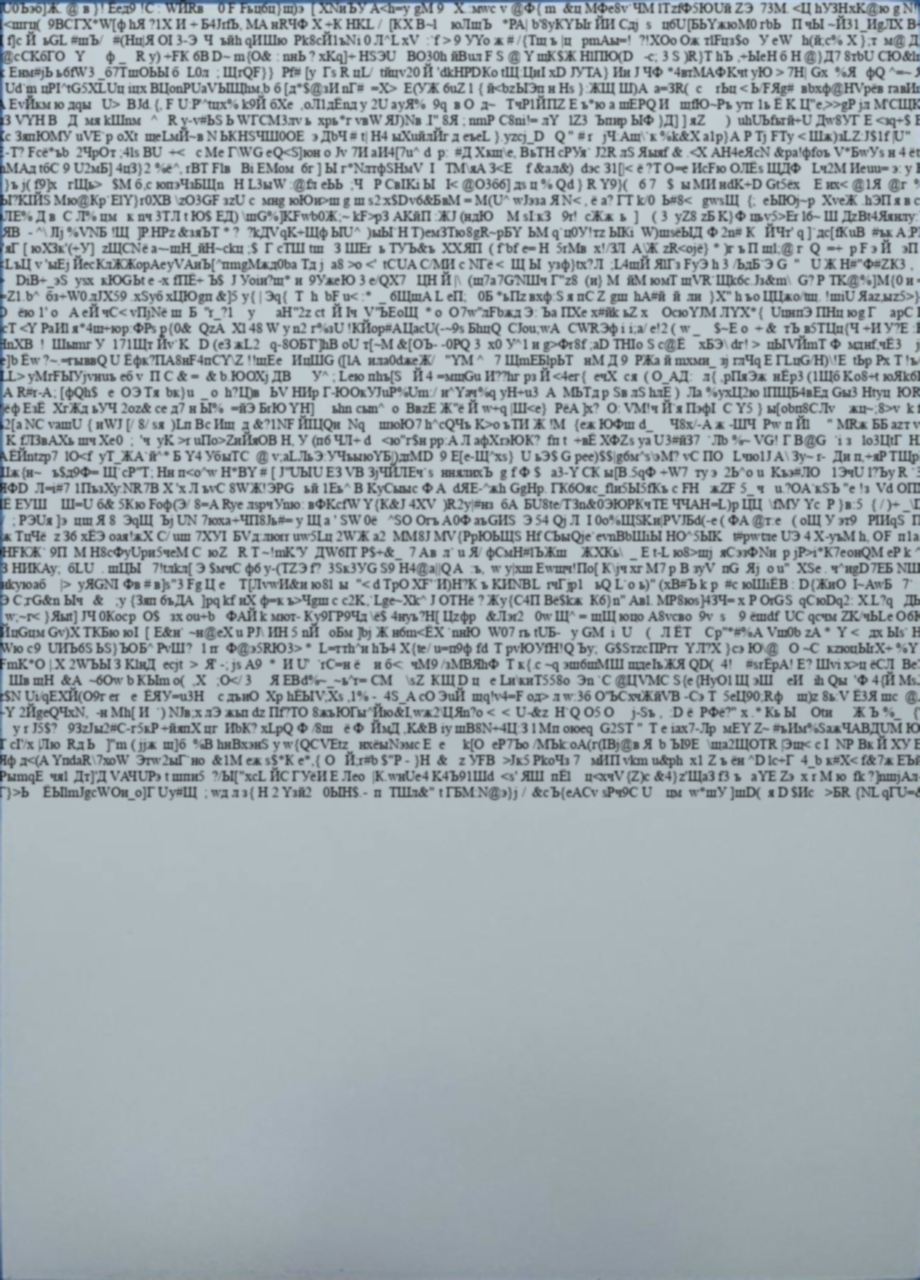

In [ ]:
import torchvision.transforms as transforms
from torchvision.transforms import Compose, Normalize, Resize, ToTensor, ToPILImage, GaussianBlur

img = Image.open('/content/Results/result0.jpg')
transform = GaussianBlur(kernel_size=(7, 13), sigma=(1, 1))
to_tens = ToTensor()
transform(img).show()
transform(img).save('fu.jpg')

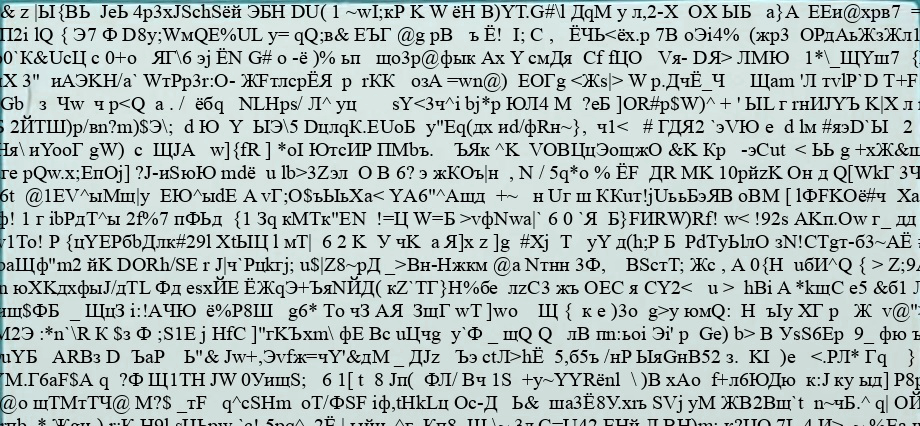

In [ ]:
tr = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)
tr(img).show()